# 2110433 - Computer Vision (2023/2)
## Lab 6 - Feature Descriptor
In this lab, we will learn to use useful handcrafted features to detect objects and merge images in the provided images. This notebook includes both coding and written questions. Please hand in this notebook file with all outputs and your answer

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 1. Hough Transform
Hough transform is a feature extraction technique used in computer vision, and digital image processing. The purpose of the technique is to find imperfect instances of objects within a certain class of shapes by a voting procedure. The classical Hough transform was concerned with the identification of lines in the image, but later the Hough transform has been extended to identifying positions of arbitrary shapes, most commonly circles or ellipses. 

### 1.1 Hough Line

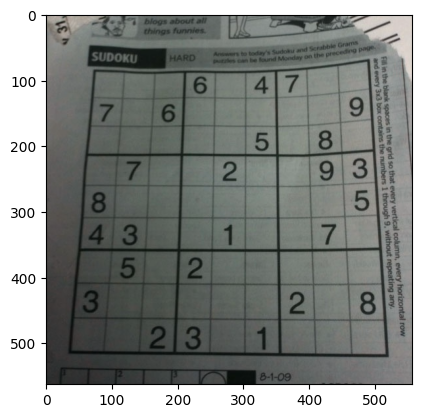

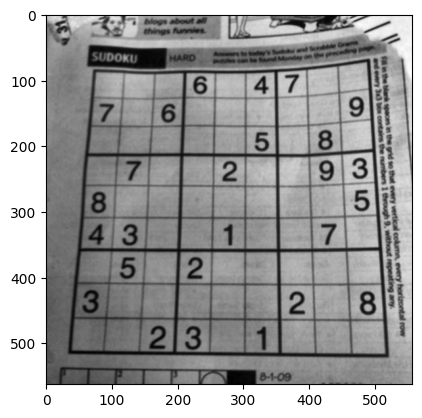

In [2]:
documentImage = cv2.imread('assets/Lab6-sudoku.jpg')
documentImageGray = cv2.cvtColor(documentImage, cv2.COLOR_BGR2GRAY)
documentImageGray = cv2.blur(documentImageGray, (3,3))
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
documentImageGray = clahe.apply(documentImageGray)
plt.imshow(documentImage, cmap='gray')
plt.show()
plt.imshow(documentImageGray, cmap='gray')
plt.show()

OpenCV already provide <a href="https://docs.opencv.org/4.5.1/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a">cv2.HoughLine</a> (Standard Hough Transform) and <a href="https://docs.opencv.org/4.5.1/dd/d1a/group__imgproc__feature.html#ga8618180a5948286384e3b7ca02f6feeb">cv2.HoughLinesP</a> (Probabilistic Hough Transform) is an optimization version of Hough Transform.

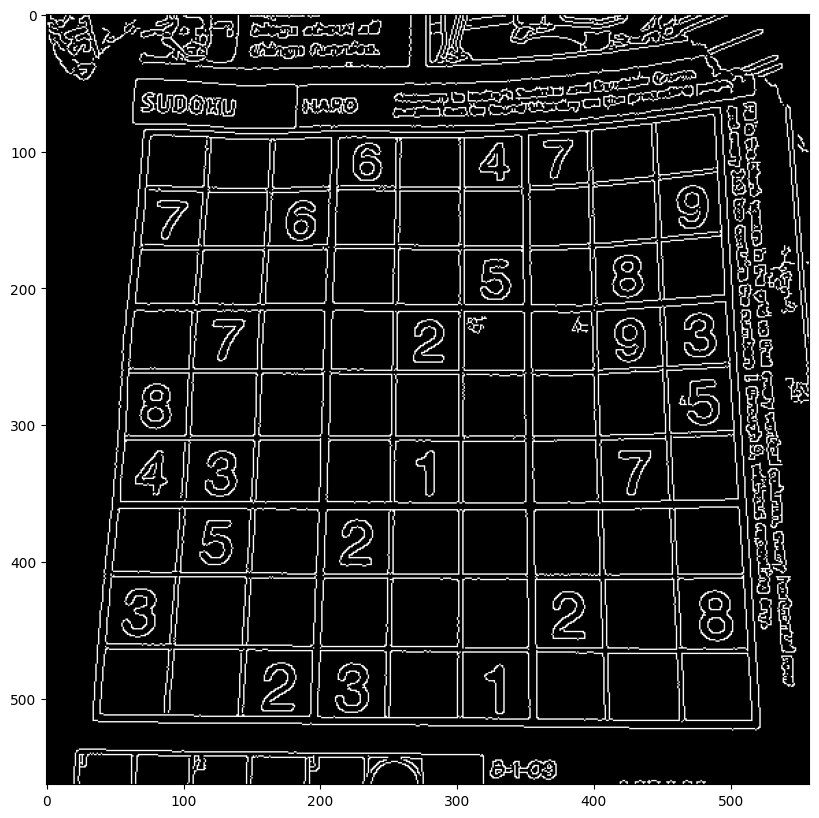

In [3]:
edges = cv2.Canny(documentImageGray,10,100)
plt.figure(figsize=(10,10))
plt.imshow(edges, cmap='gray')
plt.show()

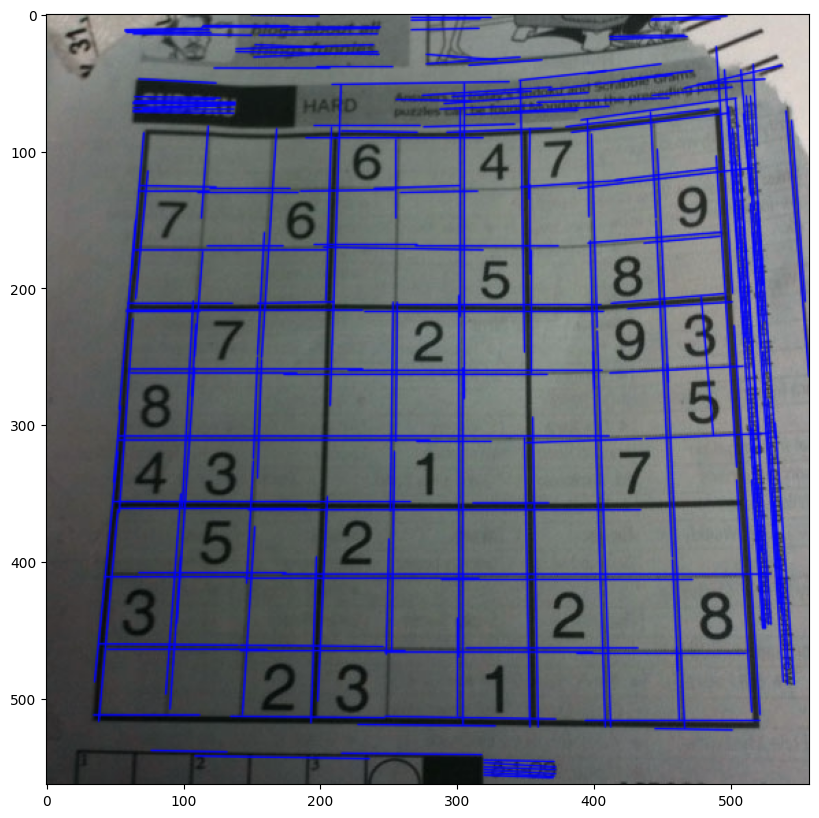

In [4]:
linesP  = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, None, 50, 10)

# Draw the lines
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(documentImage, (l[0], l[1]), (l[2], l[3]), (0,0,255), 1, cv2.LINE_AA)
        
        
plt.figure(figsize=(10,10))
plt.imshow(documentImage, cmap='gray')
plt.show()

### 1.2 Hough Circle
OpenCV provided a circle detection method slightly trickier than the standard Hough Transform. The Hough gradient method, which is made up of two main stages. The first stage involves edge detection and finding the possible circle centers and the second stage finds the best radius for each candidate center. You can read more about cv2.HoughCircles by clicking <a href="https://docs.opencv.org/4.5.1/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d">here</a>.

Read sample image

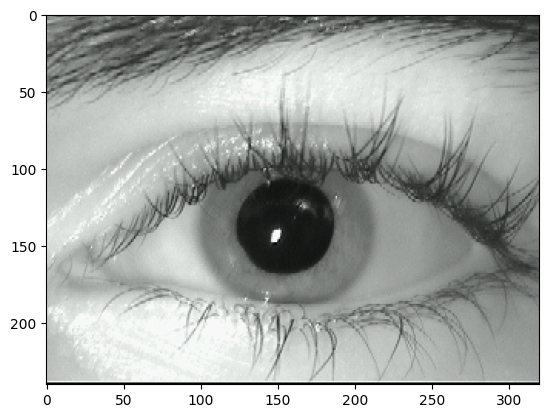

In [5]:
eyeImage = cv2.imread('assets/Lab6-HumanEye.bmp')
plt.imshow(eyeImage)
plt.show()

Convert image to grayscale, apply medianBlur and hough circle on converted image to find pupil and iris circles.

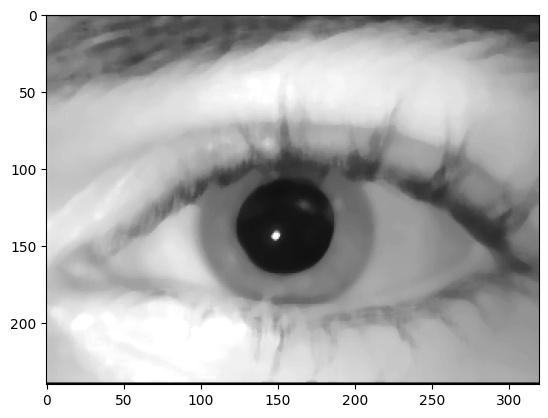

In [9]:
eyeImageGray = cv2.cvtColor(eyeImage, cv2.COLOR_BGR2GRAY) 
eyeImageGray = cv2.medianBlur(eyeImageGray, 7)
plt.imshow(eyeImageGray, cmap='gray')
plt.show()

pupilCircles = cv2.HoughCircles(eyeImageGray, method=cv2.HOUGH_GRADIENT, dp=1, minDist=100, param1=100, param2=70, minRadius=10, maxRadius=60)
irisCircles = cv2.HoughCircles(eyeImageGray, method=cv2.HOUGH_GRADIENT, dp=1, minDist=100, param1=50, param2=70, minRadius=30, maxRadius=100)

Visualize the circle output

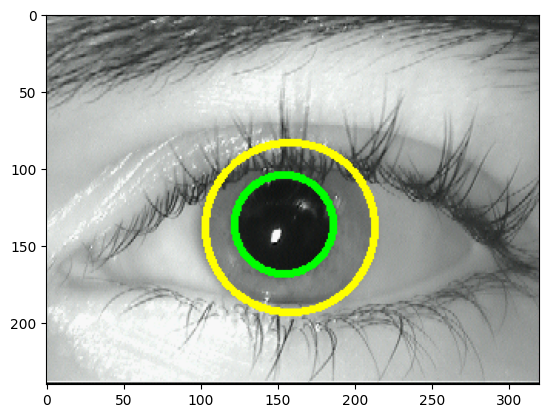

In [10]:
eyeImageOutput = eyeImage.copy()

if pupilCircles is not None:
	pupilCircles = np.round(pupilCircles[0, :]).astype("int")
	for (x, y, r) in pupilCircles:
		cv2.circle(eyeImageOutput, (x, y), r, (0, 255, 0), 4)

if irisCircles is not None:
	irisCircles = np.round(irisCircles[0, :]).astype("int")
	for (x, y, r) in irisCircles:
		cv2.circle(eyeImageOutput, (x, y), r, (255, 255, 0), 4)

plt.imshow(eyeImageOutput)
plt.show()

## 2. Feature Descriptor
OpenCV already include a large set of feature desciptor which can be call via cv2.xfeatures2d classes. More detail can be read from <a href="https://docs.opencv.org/4.5.1/d5/d51/group__features2d__main.html">here</a>

Read sample image from file

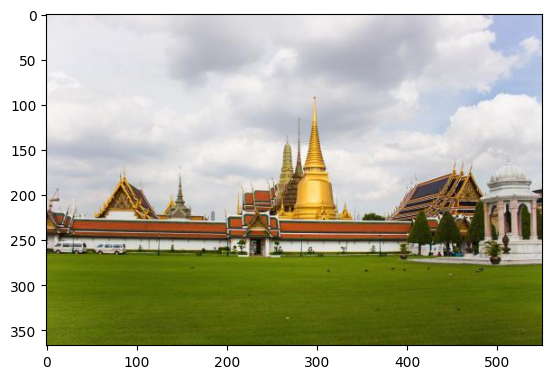

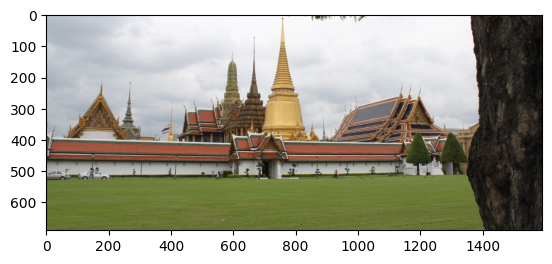

In [11]:
watPhraKaew1 = cv2.imread('assets/Lab6-w1.jpg')
watPhraKaew2 = cv2.imread('assets/Lab6-w2.jpg')

watPhraKaew1RGB = cv2.cvtColor(watPhraKaew1, cv2.COLOR_BGR2RGB)
watPhraKaew2RGB = cv2.cvtColor(watPhraKaew2, cv2.COLOR_BGR2RGB)

watPhraKaew1Gray = cv2.cvtColor(watPhraKaew1, cv2.COLOR_BGR2GRAY)
watPhraKaew2Gray = cv2.cvtColor(watPhraKaew2, cv2.COLOR_BGR2GRAY)

plt.imshow(watPhraKaew1RGB)
plt.show()

plt.imshow(watPhraKaew2RGB)
plt.show()

### 2.1 SIFT (Scale-invariant feature transform)
SIFT is both rotation as well as scale invariant. SIFT provides key points and keypoint descriptors where keypoint descriptor describes the keypoint at a selected scale and rotation with image gradients. OpenCV already provided SIFT via cv2.xfeatures2d.SIFT_create()

In [ ]:
siftExtractor = cv2.xfeatures2d.SIFT_create()
kp1, des1 = siftExtractor.detectAndCompute(watPhraKaew1Gray, None)
kp2, des2 = siftExtractor.detectAndCompute(watPhraKaew2Gray, None)


In [ ]:
watPhraKaew1KpOutput = cv2.drawKeypoints(watPhraKaew1RGB, kp1, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10,10))
plt.imshow(watPhraKaew1KpOutput)
plt.show()

In [ ]:
watPhraKaew2KpOutput = cv2.drawKeypoints(watPhraKaew2RGB, kp2, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10,10))
plt.imshow(watPhraKaew2KpOutput)
plt.show()

In [ ]:
bruteForceMatcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bruteForceMatcher.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

siftMatches = cv2.drawMatches(watPhraKaew1RGB, kp1, watPhraKaew2RGB, kp2, matches[:20], watPhraKaew2RGB, flags=2)
plt.figure(figsize=(30,30))
plt.imshow(siftMatches)
plt.show()

### 2.2 SURF (Speeded-Up Robust Features)
SURF is a patented local feature detector and descriptor. It can be used for tasks such as object recognition, image registration, classification, or 3D reconstruction. It is partly inspired by the scale-invariant feature transform (SIFT) descriptor. The standard version of SURF is several times faster than SIFT and claimed by its authors to be more robust against different image transformations than SIFT. However, SURF is not free and cannnot be used without OPENCV_ENABLE_NON_FREE flag! :(

In [ ]:
surfExtractor = cv2.xfeatures2d.SURF_create()
'''
OpenCV will thrown an error about non-free algorithm 
This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'
'''

### 2.3 FAST (Features from accelerated segment test)
Features from accelerated segment test (FAST) is a corner detection method, which could be used to extract feature points and later used to track and map objects in many computer vision tasks.

In [ ]:
fastExtractor = cv2.FastFeatureDetector_create()
fastExtractor.setNonmaxSuppression(False)
kp1 = fastExtractor.detect(watPhraKaew1Gray, None)
kp2 = fastExtractor.detect(watPhraKaew2Gray, None)

In [ ]:
watPhraKaew1KpOutput = cv2.drawKeypoints(watPhraKaew1RGB, kp1, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10,10))
plt.imshow(watPhraKaew1KpOutput)
plt.show()

In [ ]:
watPhraKaew2KpOutput = cv2.drawKeypoints(watPhraKaew2RGB, kp2, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10,10))
plt.imshow(watPhraKaew2KpOutput)
plt.show()

### 2.4 ORB (Oriented FAST and Rotated BRIEF)
ORB is an efficient open source alternative to SIFT and SURF. It computes less keypoints when compared to SIFT and SURF yet they are effective.

In [ ]:
orbExtractor = cv2.ORB_create(nfeatures=1000)
kp1, des1 = orbExtractor.detectAndCompute(watPhraKaew1Gray, None)
kp2, des2 = orbExtractor.detectAndCompute(watPhraKaew2Gray, None)

In [ ]:
watPhraKaew1KpOutput = cv2.drawKeypoints(watPhraKaew1RGB, kp1, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10,10))
plt.imshow(watPhraKaew1KpOutput)
plt.show()

In [ ]:
watPhraKaew2KpOutput = cv2.drawKeypoints(watPhraKaew2RGB, kp2, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10,10))
plt.imshow(watPhraKaew2KpOutput)
plt.show()

In [ ]:
bruteForceMatcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bruteForceMatcher.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

siftMatches = cv2.drawMatches(watPhraKaew1RGB, kp1, watPhraKaew2RGB, kp2, matches[:60], watPhraKaew2RGB, flags=2)
plt.figure(figsize=(30,30))
plt.imshow(siftMatches)
plt.show()

## Assignment 1 - Image Stitching
Image stitching or photo stitching is the process of combining multiple photographic images with overlapping fields of view to produce a segmented panorama or high-resolution image. Commonly performed through the use of computer software, most approaches to image stitching require nearly exact overlaps between images and identical exposures to produce seamless results. Luckily, OpenCV already provide <b>a super easy</b> class to merge a set of corespondings images in to panoram aimage. In this assignment, you will need to apply <a href="https://docs.opencv.org/4.5.1/d2/d8d/classcv_1_1Stitcher.html">cv2.Stitcher_create</a> on the collection of images provided in assets directory to create a single panorama image.<br>
<b> Hint: This assignment is super easy</b>
<br>
OpenCV image Stitching pipeline
<img src="https://docs.opencv.org/master/StitchingPipeline.jpg"></img>

In [ ]:
### FILL HERE ###